In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px

## 1. Tratamento e Limpeza de dados

##### Inicialmente, os dados estavam organizados por ano e apresentavam colunas extras em algumas linhas, o que exigiu a adição temporária de novas colunas ao arquivo para permitir a leitura correta dos dados. Após essa etapa, as colunas extras foram removidas. Também foi necessário eliminar linhas inconsistentes nos bancos de dados, como a primeira e a última de cada arquivo. Concluído esse tratamento, todos os arquivos foram concatenados em um único arquivo, visando simplificar as análises posteriores.

In [168]:
df24 = pd.read_csv('consultaDespesa_Prefeitura_Teixeira_2024.csv', sep=';')
df24 = df24.drop(df24.columns[[28, 29, 30, 31]], axis=1)
df24 = df24.drop([0, 8682], axis=0)

df23 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2023.csv', sep=';')
df23 = df23.drop(df23.columns[[28,29, 30, 31,32,33,34]], axis=1)
df23 = df23.drop([0, 9945], axis=0)

df22 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2022.csv', sep=';', )
df22 = df22.drop(df22.columns[[28,29, 30, 31]], axis=1)
df22 = df22.drop([0, 13102], axis=0)

df21 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2021.csv', sep=';')
df21 = df21.drop(df21.columns[[28,29, 30, 31]], axis=1)
df21 = df21.drop([0, 10744], axis=0)

df20 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2020.csv', sep=';')
df20 = df20.drop(df20.columns[[28,29, 30, 31]], axis=1)
df20 = df20.drop([0, 6378], axis=0)

df19 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2019.csv', sep=';')
df19 = df19.drop(df19.columns[[28,29, 30, 31]], axis=1)
df19 = df19.drop([0, 5719], axis=0)

df18= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2018.csv', sep=';', )
df18 = df18.drop(df18.columns[[28,29, 30, 31]], axis=1)
df18 = df18.drop([0, 5297], axis=0)

df17= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2017.csv', sep=';')
df17 = df17.drop(df17.columns[[28,29, 30, 31]], axis=1)
df17 = df17.drop([0, 6082], axis=0)

df16= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2016.csv', sep=';')
df16 = df16.drop(df16.columns[[28,29, 30, 31]], axis=1)
df16 = df16.drop([0, 8391], axis=0)

df15= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2015.csv', sep=';')
df15 = df15.drop(df15.columns[[28,29, 30, 31,32]], axis=1)
df15 = df15.drop([0, 6977], axis=0)

df14= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2014.csv', sep=';')
df14 = df14.drop(df14.columns[[28,29, 30, 31,32]], axis=1)
df14 = df14.drop([0, 5589], axis=0)

df = pd.concat([df24, df23, df22, df21, df20 ,df19 ,df18 ,df17 ,df16, df15,df14])

## Baguncei tudo kkk

So para ver algumas informações, vou deixar aqui as features que acho importante, vale salientar que temos grande parte como coluna categorica mas a boa noticia que tem um codigo para cada valor ou seja fique bem melhor de trabalhar, pois ja estão com um rotulo so tratar, e temos 15 mil dados de licitações o que é bom, deixarei as feature a seguir:

data
fonte recurso
unid. orc
função
subfunção,
programa
ação
Elemento, 
valor liquidado

algumas são obvias outras eu olhei a distribuição para saber se iam ser validas ou não, depois da uma analisada, as que tinha muito de um so tipo eu desconsiderei

In [169]:
df2 = df[df["Licitação"] == "SIM"]

In [170]:
df2

,Unnamed: 0,Número,Data,Nome,CPF/CNPJ,Licitação,Nº Licitação,Histórico,Fonte Recurso,Modalidade,...,Elemento,Valor Fixado,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Anulado,Valor Saldo,Data de Pagamento,Data de Liquidação,Data de Liquidação
50,DL,187,12/01/2024,ONI TELECOM SERVICOS E COMERCIO LTDA,***.660.000-**,SIM,000092022,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,15001000 - Recursos Livres (Ordinário),0 - Ordinário,...,40 - Serviços De Tecnologia Da Informação E Co...,"5.000,00","750,00","750,00","750,00",NaN,"0,00",22/01/2024,12/01/2024,NaN
51,DL,191,12/01/2024,MIRELLY SANTOS LEITE,***.449.477-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
52,DL,192,12/01/2024,VALDEMIR LAURENTINO DA SILVA,***.863.405-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
53,DL,193,12/01/2024,RUBENI NUNES DE SOUZA,***.912.484-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
54,DL,194,12/01/2024,LYSANDRA DA SILVA MARTINS,***.931.408-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,DL,4733,21/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","15.126,25","15.126,25","0,00",NaN,"15.126,25",NaN,21/11/2014,NaN
5584,DL,4781,28/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","6.528,75","6.528,75","0,00",NaN,"6.528,75",NaN,28/11/2014,NaN
5586,DL,5266,24/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,0 - Ordinário,...,32 - Material de Distribuição Gratuita,"630,00","11.397,20","11.397,20","0,00",NaN,"11.397,20",NaN,24/12/2014,NaN
5587,DL,5269,26/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","7.022,32","7.022,32","0,00",NaN,"7.022,32",NaN,26/12/2014,NaN


In [171]:
df2.iloc[1,:]

Unnamed: 0                                                            DL
 Número                                                              191
Data                                                          12/01/2024
Nome                                                MIRELLY SANTOS LEITE
CPF/CNPJ                                                  ***.449.477-**
Licitação                                                            SIM
Nº Licitação                                                   000092023
Histórico              VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...
Fonte Recurso          16600000 - Transferência de Recursos do Fundo ...
Modalidade                                                 0 - Ordinário
Órgão                               2 - Prefeitura Municipal de Teixeira
Unid. Orc               2120 - Fundo Municipal de Ação e Promoção Social
Função                                            8 - Assistência Social
Subfunção                                  244 - As

In [172]:
#boa provavelmente
print(df2["Elemento"].value_counts())

Elemento
30 - Material de Consumo                                                                  5118
39 - Outros Serviços de Terceiros - Pessoa Jurídica                                       3307
36 - Outros Serviços de Terceiros - Pessoa Física                                         2657
30 - Material De Consumo                                                                   962
36 - Outros Serviços De Terceiros - Pessoa Física                                          798
39 - Outros Serviços De Terceiros - Pessoa Jurídica                                        760
32 - Material de Distribuição Gratuita                                                     508
35 - Serviços de Consultoria                                                               208
52 - Equipamentos e Material Permanente                                                    172
51 - Obras e Instalações                                                                   169
90 - Aplicações Diretas                  

In [173]:
# não vejo boa correlaçao disso com anomalia
print(df2["Natureza"].value_counts())

Natureza
3 - OUTRAS DESPESAS CORRENTES                                                                                        11940
3 - Outras Despesas Correntes                                                                                         2648
4 - INVESTIMENTOS                                                                                                      341
4 - Investimentos                                                                                                       99
3 - Despesas Correntes                                                                                                  78
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS       29
3 - DESPESAS CORRENTES                                                                                                  23
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         11
4 - DES

In [174]:
# não vejo boa correlaçao disso com anomalia
print(df2["Modalidade"].value_counts())

Modalidade
0 - Ordinário                                                                                                                                                                                                            14678
2 - Global                                                                                                                                                                                                                 350
16320000 - Transferências do Estado referentes a Convênios e Instrumentos Congêneres vinculados à Saúde                                                                                                                     51
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde                                                                     32
 E, QUE SERÃO PAGOS COM RECURSO PROVENIENTE DO BLOCO PARA A MANUTENÇÃO DAS AÇÕES E SERVIÇOS PÚBLI

In [175]:
#coluna com provavel boa correlação com questão de anomalia

print(df2["Fonte Recurso"].value_counts())

Fonte Recurso
15001000 - Recursos Livres (Ordinário)                                                                                                                     1901
0 - Recursos Ordinários                                                                                                                                    1038
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde     904
1001 - Recursos Ordinários                                                                                                                                  839
15001002 - Recursos não Vinculados de Impostos - Saúde                                                                                                      737
                                                                                                                                                           ... 
012.331.                  

In [176]:
# nao compensa essa coluna
print(df2["Categoria Econômica"].value_counts())

Categoria Econômica
3 - DESPESAS CORRENTES                                                                                               11940
3 - Despesas Correntes                                                                                                2648
4 - DESPESAS DE CAPITAL                                                                                                342
4 - Despesas De Capital                                                                                                 99
1003 - Implementar novo modelo de gestão na Saúde                                                                       47
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         39
2015 - Manutenção da Unidade Mista Sancho Leite-RECURSOS PRÓPRIOS                                                       28
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS      

In [177]:
df2 = df2.drop([
    "Unnamed: 0",
    " Número",
    "Nome",
    "CPF/CNPJ",
    "Licitação",
    "Nº Licitação",
    "Histórico",
    "Órgão",
    "Categoria Econômica",
    "Natureza",
    "Aplicação",
    "Valor Fixado",
    "Valor Liquidado",
    "Valor Pago",
    "Valor Anulado",
    " Valor Saldo",
    "Data de Pagamento",
    " Data de Liquidação",
    "Data de Liquidação",
    "Modalidade"
], axis = 1)

In [178]:
df2['Valor Empenhado'] = (
    df2['Valor Empenhado']
    .str.replace('.', '', regex=False)   # Remove separadores de milhar
    .str.replace(',', '.', regex=False) 
    .pipe(pd.to_numeric, errors='coerce') # Converte para float, ignorando erros
)

In [179]:
df2

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
50,12/01/2024,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00
51,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
52,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
53,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
54,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
...,...,...,...,...,...,...,...,...,...
5583,21/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25
5584,28/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75
5586,24/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20
5587,26/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32


In [180]:
df2.dtypes

Data                object
Fonte Recurso       object
Unid. Orc           object
Função              object
Subfunção           object
Programa            object
Ação                object
Elemento            object
Valor Empenhado    float64
dtype: object

In [181]:
df2.describe()

,Valor Empenhado
count,15134.000000
mean,8479.552755
std,26000.675153
min,0.000000
25%,1300.000000
50%,2490.045000
75%,6208.352500
max,635784.590000


#### Poucas linhas nulas, menos que 1%, então resolvi so tirar

In [182]:
df2.isnull().sum()

Data                0
Fonte Recurso      29
Unid. Orc          35
Função             35
Subfunção          35
Programa           35
Ação               35
Elemento           35
Valor Empenhado    85
dtype: int64

In [183]:
df2 = df2.dropna()

#### Verificando o valor maximo encontrado no dataframe

In [184]:
maximo = df2[(df2['Valor Empenhado'] >= 635784.590000)] 
maximo

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
5503,04/07/2016,50 - Transferência de Convênios  Educação  F...,2080 - Secretaria de Educação,12 - Educação,361 - Ensino Fundamental,1027 - Programa de Revitalização do Ensino Fun...,1043 - Const. e Ampl.e Reforma de Unidades Esc...,51 - Obras e Instalações,635784.59


#### Devido à presença de múltiplos nomes na coluna "Função", que se referiam à mesma categoria, foi necessário estabelecer uma relação entre os diferentes nomes e suas respectivas áreas. Essa abordagem visa facilitar uma análise mais precisa e abrangente das áreas de investimento nos últimos 10 anos.

In [185]:
df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y', errors='coerce')
df2.dropna(subset=['Data'], inplace =True)                                                         #coloca os anos em inteiros
df2.loc[:, 'Ano'] = df2['Data'].dt.year.astype(int)

C:\Users\nunes\AppData\Local\Temp\ipykernel_12536\985741880.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nunes\AppData\Local\Temp\ipykernel_12536\985741880.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nunes\AppData\Local\Temp\ipykernel_12536\985741880.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [186]:
df2.duplicated().sum()

np.int64(1233)

In [187]:
df2 = df2.drop_duplicates()

In [188]:
funcoes={
    '8 - Assistência Social' : 'social',
    '10 - Saúde' : 'saude',
    '2080 - Fundo Municipal de Saúde' : 'saude',
    '4 - Administração' : 'administracao',
    '2040 - Secretaria de Administração' : 'administracao',
    '20 - Agricultura' : 'agricultura',
    '2090 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '13 - Cultura' : 'cultura',
    '12 - Educação' : 'educacao',
    '2150 - Secretaria de Educação' : 'educacao',
    '15 - Urbanismo' : 'urbanizacao',
    '2170 - Secretaria de Infraestrutura e Serviços Urbanos' : 'urbanizacao',
    '2050 - Secretaria de Saúde' : 'saude',
    '2090 - Fundo Municipal de Saúde' : 'saude',
    '2080 - Secretaria de Educação' : 'educacao',
    '2020 - Secretaria de Administração' : 'administracao',
    '2060 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '2110 - Secretaria de Planejamento' : 'urbanizacao',
}

df2['categoria'] = df2['Função'].map(funcoes)

#### A partir da análise do gráfico, observa-se um aumento significativo de mais de 20 milhões nos gastos com licitações ao longo dos últimos 10 anos. isso em uma cidade de 15 mil habitantes, logo se faz necessário investigar se esses gastos com licitações estão realmente sendo retornados a população

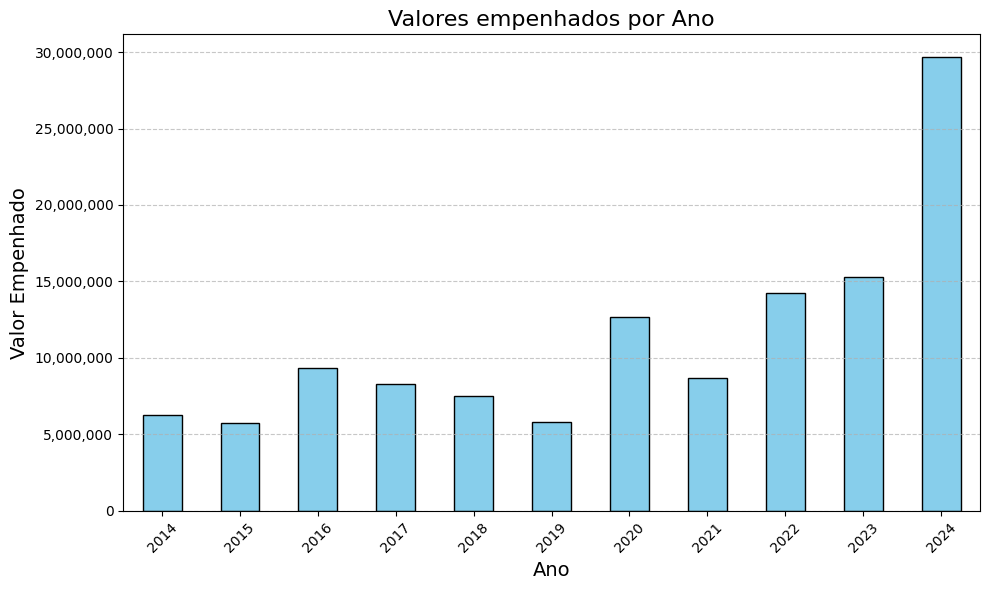

In [189]:
valores_por_ano = df2.groupby('Ano')['Valor Empenhado'].sum()

plt.figure(figsize=(10, 6))
valores_por_ano.plot(kind='bar', color=['skyblue'], edgecolor='black')
plt.title('Valores empenhados por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor Empenhado', fontsize=14)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  #ajusta a escala do eixo y para milhões
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Por meio de um gráfico de linhas, é possível observar de maneira mais clara o crescimento dos investimentos em diversas áreas, permitindo uma comparação eficaz com o aumento das despesas.

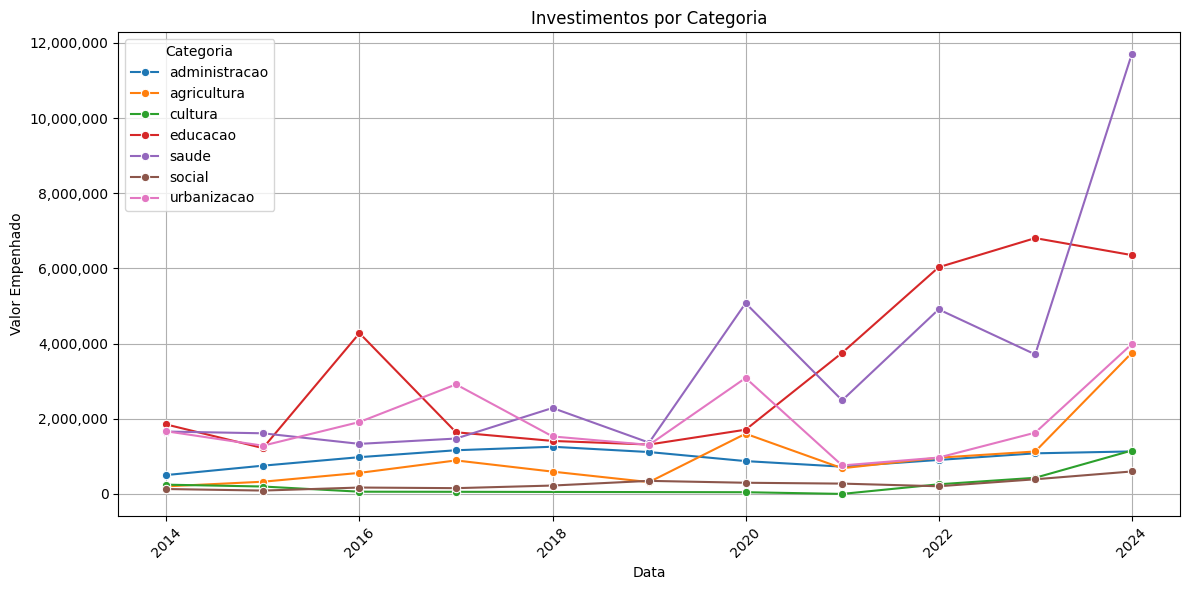

In [190]:
df_categorias = df2.groupby(['Ano', 'categoria'])[['Valor Empenhado']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_categorias, x='Ano', y='Valor Empenhado', hue='categoria', marker='o')


plt.title('Investimentos por Categoria')
plt.xlabel('Data')
plt.ylabel('Valor Empenhado')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

#### Observa-se um expressivo crescimento nos valores destinados a diversas áreas, com destaque para a educação e saúde, que apresentaram os maiores orçamentos nos últimos anos. Além disso, é importante ressaltar o notável aumento de investimentos no setor da saúde em que 1 ano teve seu orçamento de licitações triplicado

In [191]:
df_filtered = df_categorias[df_categorias['Ano'].isin([2014, 2024])]
df_pivot = df_filtered.pivot(index='categoria', columns='Ano', values='Valor Empenhado')
df_pivot['Aumento (%)'] = ((df_pivot[2024] - df_pivot[2014]) / df_pivot[2014]) * 100
df_pivot['Aumento (%)'] = df_pivot['Aumento (%)'].round(2)
df_pivot


Ano,2014,2024,Aumento (%)
categoria,,,
administracao,503981.24,1132390.94,124.69
agricultura,203339.28,3752133.43,1745.26
cultura,247640.00,1155442.57,366.58
educacao,1848862.69,6356383.38,243.80
saude,1661338.58,11698670.28,604.17
social,131967.27,599122.10,353.99
urbanizacao,1667897.28,3986094.75,138.99


#### Analisar as Licitações ajuda a verificar os investimentos nos ultimos anos em obras, saúde, educação e segurança

In [192]:
df4 = df2.copy()

In [193]:
df4.iloc[1,:]

Data                                             2024-01-12 00:00:00
Fonte Recurso      16600000 - Transferência de Recursos do Fundo ...
Unid. Orc           2120 - Fundo Municipal de Ação e Promoção Social
Função                                        8 - Assistência Social
Subfunção                              244 - Assistência Comunitária
Programa           1002 - Promoção social à família, à criança, a...
Ação               2040 - Manutenção das Atividades Bloco da Prot...
Elemento                      92 - Despesas De Exercícios Anteriores
Valor Empenhado                                               315.78
Ano                                                             2024
categoria                                                     social
Name: 51, dtype: object

In [194]:
df4['Mes'] = df4['Data'].dt.month
df4['Dia'] = df4['Data'].dt.day

In [195]:
#extraindo os codigos das categorias

df4['Fonte_Recurso_codigo'] = df4['Fonte Recurso'].str.extract(r'^(\d+)').astype(float)
df4['Unid_Orc_codigo'] = df4['Unid. Orc'].str.extract(r'^(\d+)').astype(float)
df4['Funcao_codigo'] = df4['Função'].str.extract(r'^(\d+)').astype(float)
df4['Subfuncao_codigo'] = df4['Subfunção'].str.extract(r'^(\d+)').astype(float)
df4['Programa_codigo'] = df4['Programa'].str.extract(r'^(\d+)').astype(float)
df4['Acao_codigo'] = df4['Ação'].str.extract(r'^(\d+)').astype(float)
df4['Elemento_codigo'] = df4['Elemento'].str.extract(r'^(\d+)').astype(float)

In [196]:
df4

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,categoria,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo
50,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,social,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0
51,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
112,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,social,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0
119,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
120,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,social,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,2014-11-21,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25,2014,saude,11,21,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5584,2014-11-28,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75,2014,saude,11,28,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5586,2014-12-24,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20,2014,saude,12,24,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5587,2014-12-26,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32,2014,saude,12,26,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0


#### usando isolation forest para rotular

In [197]:
df4.columns

Index(['Data', 'Fonte Recurso', 'Unid. Orc', 'Função', 'Subfunção', 'Programa',
       'Ação', 'Elemento', 'Valor Empenhado', 'Ano', 'categoria', 'Mes', 'Dia',
       'Fonte_Recurso_codigo', 'Unid_Orc_codigo', 'Funcao_codigo',
       'Subfuncao_codigo', 'Programa_codigo', 'Acao_codigo',
       'Elemento_codigo'],
      dtype='object')

In [198]:
Treino = df4.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]] 

In [199]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.10, random_state=42)
df4['anomaly'] = model.fit_predict(Treino)
df4 = df4.reset_index(drop=True)

label:

-1 anomalia

 1 normal

In [200]:
df4

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,...,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo,anomaly
0,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,...,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0,1
1,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
2,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,...,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0,1
3,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
4,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,...,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,2014-11-21,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25,2014,...,11,21,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,-1
13897,2014-11-28,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75,2014,...,11,28,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13898,2014-12-24,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20,2014,...,12,24,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13899,2014-12-26,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32,2014,...,12,26,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1


In [201]:
df4.duplicated().sum()

np.int64(0)

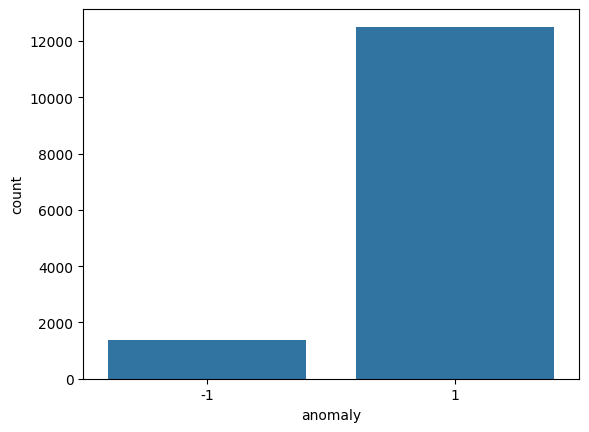

In [202]:
sns.countplot(data = df4, x = "anomaly");

### Investigando a área que teve maior quantidade de anomalias

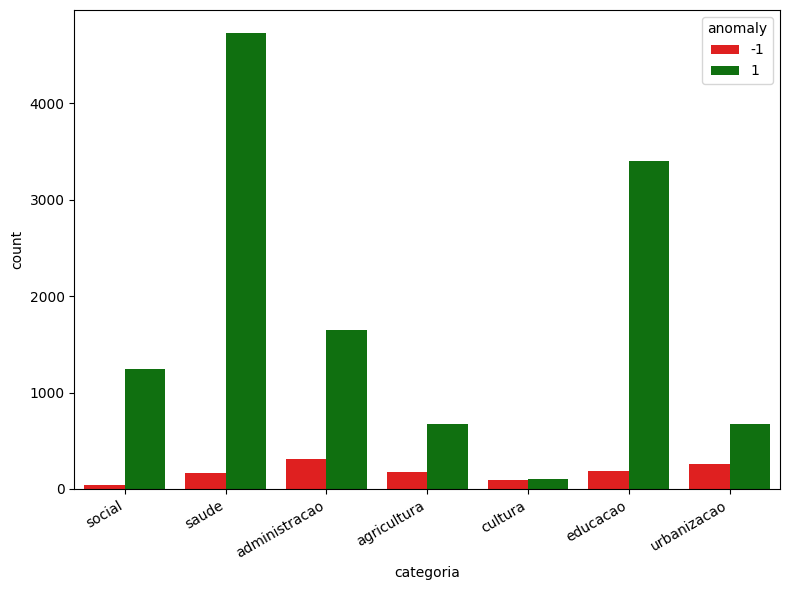

In [203]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df4, x="categoria", hue="anomaly", palette={-1: "red", 1: "green"})
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### Reduzindo dimensionalidade

In [204]:
df4.iloc[1,:]

Data                                                  2024-01-12 00:00:00
Fonte Recurso           16600000 - Transferência de Recursos do Fundo ...
Unid. Orc                2120 - Fundo Municipal de Ação e Promoção Social
Função                                             8 - Assistência Social
Subfunção                                   244 - Assistência Comunitária
Programa                1002 - Promoção social à família, à criança, a...
Ação                    2040 - Manutenção das Atividades Bloco da Prot...
Elemento                           92 - Despesas De Exercícios Anteriores
Valor Empenhado                                                    315.78
Ano                                                                  2024
categoria                                                          social
Mes                                                                     1
Dia                                                                    12
Fonte_Recurso_codigo                  

In [205]:
print(df4["Elemento_codigo"].value_counts())

Elemento_codigo
30.0    5983
39.0    3903
36.0    2550
32.0     541
35.0     243
52.0     218
51.0     212
40.0     101
90.0      89
92.0      54
33.0       3
48.0       2
61.0       1
31.0       1
Name: count, dtype: int64


In [206]:
codigos_validos = df4["Elemento_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Elemento_codigo"].isin(codigos_validos)]
print(df4_filtrado["Elemento_codigo"].nunique())

8


In [207]:
print(df4["Fonte_Recurso_codigo"].value_counts())

Fonte_Recurso_codigo
15001000.0    1705
1001.0        1163
0.0            996
16000000.0     857
2.0            807
              ... 
17210000.0       1
1390.0           1
1290.0           1
1121.0           1
1610.0           1
Name: count, Length: 79, dtype: int64


In [208]:
codigos_validos = df4["Fonte_Recurso_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Fonte_Recurso_codigo"].isin(codigos_validos)]
print(df4_filtrado["Fonte_Recurso_codigo"].nunique())

27


In [209]:
print(df4["Unid_Orc_codigo"].value_counts())

Unid_Orc_codigo
2080.0    3411
2090.0    3024
2150.0    1832
2040.0     727
2020.0     698
2100.0     654
2030.0     608
2060.0     564
2120.0     505
2010.0     448
2170.0     327
2050.0     323
2070.0     266
2140.0     147
2210.0     126
2.0         89
2200.0      72
2180.0      67
2110.0      12
2130.0       1
Name: count, dtype: int64


In [210]:
codigos_validos = df4["Unid_Orc_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Unid_Orc_codigo"].isin(codigos_validos)]

In [211]:
print(df4_filtrado["Unid_Orc_codigo"].nunique())

15


In [212]:
print(df4["Funcao_codigo"].value_counts())

Funcao_codigo
10.0      4822
12.0      3579
4.0       1958
8.0       1294
15.0       932
20.0       845
13.0       192
24.0        91
2080.0      71
18.0        49
27.0        28
26.0        16
2090.0       8
2150.0       6
2170.0       2
25.0         2
23.0         2
14.0         2
2040.0       1
2050.0       1
Name: count, dtype: int64


In [213]:
codigos_validos = df4["Funcao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Funcao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Funcao_codigo"].nunique())

7


In [214]:
print(df4["Subfuncao_codigo"].value_counts())

Subfuncao_codigo
122.0    3238
361.0    2843
301.0    2761
302.0    1569
244.0     908
123.0     570
306.0     421
365.0     225
392.0     180
305.0     165
243.0     152
242.0     146
303.0     115
131.0      91
10.0       75
368.0      70
451.0      69
304.0      55
126.0      38
121.0      34
421.0      33
812.0      27
606.0      26
541.0      21
782.0      16
366.0      15
695.0      10
12.0        7
605.0       7
20.0        4
422.0       2
15.0        2
752.0       2
4.0         1
367.0       1
813.0       1
785.0       1
Name: count, dtype: int64


In [215]:
codigos_validos = df4["Subfuncao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Subfuncao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Subfuncao_codigo"].nunique())

13


In [216]:
print(df4["Programa_codigo"].value_counts())

Programa_codigo
1001.0    1808
1003.0    1794
1027.0    1606
1007.0    1604
2001.0     746
1004.0     653
2004.0     645
1002.0     582
2011.0     578
2015.0     551
1037.0     441
1006.0     378
2003.0     305
2013.0     253
1017.0     234
2010.0     225
1005.0     198
1022.0     190
1020.0     174
1018.0     147
2019.0     134
2021.0     104
1026.0     102
1032.0      65
302.0       59
1031.0      54
1021.0      52
1008.0      41
1030.0      38
2017.0      28
1.0         24
2020.0      12
1025.0      11
301.0       10
1010.0       8
1034.0       8
1016.0       7
122.0        7
303.0        6
361.0        6
4.0          6
1029.0       2
1028.0       2
365.0        1
1033.0       1
1014.0       1
Name: count, dtype: int64


In [217]:
codigos_validos = df4["Programa_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Programa_codigo"].isin(codigos_validos)]
print(df4_filtrado["Programa_codigo"].nunique())

23


In [218]:
print(df4["Acao_codigo"].value_counts())

Acao_codigo
2057.0    1180
2058.0    1126
2032.0     751
2006.0     645
2008.0     615
          ... 
1052.0       1
1059.0       1
1070.0       1
2081.0       1
2039.0       1
Name: count, Length: 121, dtype: int64


In [219]:
codigos_validos = df4["Acao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Acao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Acao_codigo"].nunique())

35
